# Convex Hull

Finding the convex hull for a  collection of points with Python 

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

## What is a convex hull?

### From Wikipedia:

In mathematics, the convex hull of a set X of points in a Euclidean space is the smallest convex set that contains X.

A set of points is defined to be convex if it contains the line segments connecting each pair of its points. The convex hull of a given set X may be defined as:

    The (unique) minimal convex set containing X
    The intersection of all convex sets containing X
    The set of all convex combinations of points in X
    The union of all simplices with vertices in X

The algorithmic problem of finding the convex hull of a finite set of points in Euclidean spaces is one of the fundamental problems of computational geometry.

### Intuitive Explanation:

If you were to hammer a bunch of nails into a wall and stretch a rubberband around all the nails, the path of the rubberband is the convex hull of the set of points (nails)... Much better!

### Implementation

In the abstract, CH seeks to find the subset of points that circumscribe a set of points by finding the sequence of points that, when connected in a clockwise fashion, only make right-hand turns. Think about that - start with the lowest x-value point in a set of points and add every other point, in order of increasing x value with the only constraint that the resulting sequence of points, when connected, only make right turns. Eventually you will resolve to the one and only solution, the convex hull; any other sequence of points would inevitably make a left-hand turn. 

The implmentation of Convex Hull follows the general format:

    1. Input a list of x,y point tuples
    2. Sort list by ascending x, breaking ties with ascending y
    3. initialize upper hull (UH) with leftmost 2 points in sorted list
    4. For all the remaining points, in sequence:
        a. add point to the UH
        b. compute the crossproduct* (cp) of the last three points in UH
            - If the cp < 0 the last three points were a right turn
                - Great! Keep going!
            - If the cp > 0 the last three points were a left turn.. :(
                - Balls! The second to last point is not part of hull
                - Drop second to last point and recalculate cp
                    - Repeat until a right turn or down to 2 points
                        - If down to 2 points, add next x and keep going!
    5. Initialize lower hull (LH) with rightmost two points
        a. repeat process except in descending x order
    6. Combine upper and lower hull, remove duplicate points
    7. Profit

### Additional Information:

*crossproduct:

http://mathworld.wolfram.com/CrossProduct.html

https://en.wikipedia.org/wiki/Cross_product

Algorithms in a Nutshell - Heineman, Pollice, and Selkow - O'Reilly 2016

Python Algorithms - Magnus Lie Hetland - APress 2014

In [2]:
def crossproduct(p1, p2, p3):
    '''
    get crossproduct of three points [p1, p2, p3]:
    cp = (p2[x] - p1[x]) * (p3[y] - p1[y]) - (p2[y] - p1[y]) * (p3[x] - p1[x])
    value < 0 indicates a right turn, value > 0 indicates a left turn
    '''
    return (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])

def convex_hull(pts):  # list of (x, y) point tuples
    
    n = len(pts)
    # if three or fewer, all points are convex hull
    if n <= 3: return pts
    
    # sort points ascending by x, break tie with lowest y
    pts.sort(key=lambda x: (x[0], -x[1]))
    
    # start with leftmost 2 pts for upper hull, rightmost 2 for lower hull
    upper_hull = pts[:2]; lower_hull = pts[:-3:-1]
    
    # build upper - start far left progress increasing x
    for i in range(2, n):
        upper_hull.append(pts[i])
        while crossproduct(
            upper_hull[-3], upper_hull[-2], upper_hull[-1]) >= 0:
            upper_hull.pop(-2)
            if len(upper_hull) == 2: break
  
    # build lower - start far right progress decreasing x
    for i in range(-3, -n-1, -1):
        lower_hull.append(pts[i])
        while crossproduct(
            lower_hull[-3], lower_hull[-2], lower_hull[-1]) >= 0:
            lower_hull.pop(-2)
            if len(lower_hull) == 2: break
                
    return upper_hull, lower_hull       

### That's it!

Here it is in action:

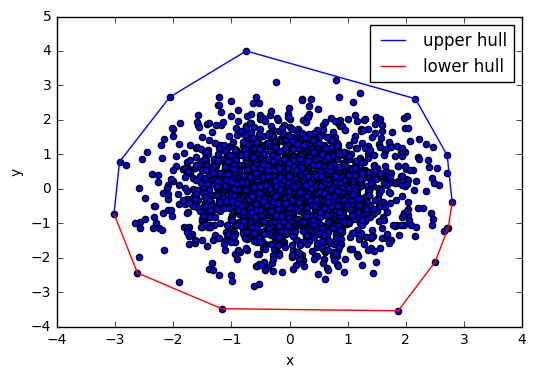

In [3]:
# generate 2000 random points where both the x and y values are drawn 
# from a standard normal distribution [mean=0, stdev=1]
pts = [(np.random.randn(), np.random.randn()) for _ in range(2000)]

# unzip the list of (x,y) tuples into lists of xs and ys and plot points
xs, ys = zip(*pts)
plt.scatter(xs, ys)

# get upper and lower hulls as lists of x,y point tuples from convex_hull()
up_hull, lw_hull = convex_hull(pts)

# unzip upper_hull x,y tuples into lists of xs and ys and plot as line
uh_xs, uh_ys = zip(*up_hull)
plt.plot(uh_xs, uh_ys, label='upper hull', color='b')

# unzip lower_hull x,y tuples into lists of xs and ys and plot as line
lh_xs, lh_ys = zip(*lw_hull)
plt.plot(lh_xs, lh_ys, label='lower hull', color='r')

# add the legend
plt.legend(); plt.xlabel('x'); plt.ylabel('y')

plt.show()

Success!